In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

In [5]:
series = pd.read_csv('shampoo_sales.csv', header=0, index_col=0, parse_dates=True,
squeeze=True, date_parser=parser)

<ipython-input-4-3ceae1076e88>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime.strptime('190'+x, '%Y-%m')


In [6]:
series

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
1901-07-01    231.8
1901-08-01    224.5
1901-09-01    192.8
1901-10-01    122.9
1901-11-01    336.5
1901-12-01    185.9
1902-01-01    194.3
1902-02-01    149.5
1902-03-01    210.1
1902-04-01    273.3
1902-05-01    191.4
1902-06-01    287.0
1902-07-01    226.0
1902-08-01    303.6
1902-09-01    289.9
1902-10-01    421.6
1902-11-01    264.5
1902-12-01    342.3
1903-01-01    339.7
1903-02-01    440.4
1903-03-01    315.9
1903-04-01    439.3
1903-05-01    401.3
1903-06-01    437.4
1903-07-01    575.5
1903-08-01    407.6
1903-09-01    682.0
1903-10-01    475.3
1903-11-01    581.3
1903-12-01    646.9
Name: Sales, dtype: float64

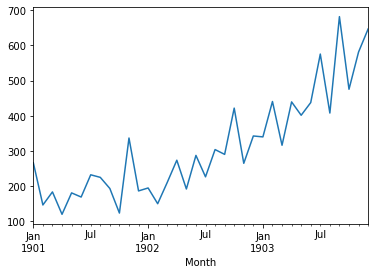

In [7]:
series.plot()
plt.show()

In [ ]:
# We can see that the Shampoo Sales dataset has a clear trend. This suggests that the time
# series is not stationary and will require differencing to make it stationary, at least a difference
# order of 1.

In [ ]:
# Let's also take a quick look at an autocorrelation plot of the time series.

In [8]:
from pandas.plotting import autocorrelation_plot

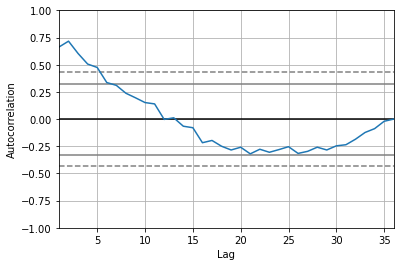

In [9]:
autocorrelation_plot(series)
plt.show()

In [ ]:
# Running the example, we can see that there is a positive correlation with the first 10-to-12
# lags that is perhaps significant for the first 5 lags. A good starting point for the AR parameter
# of the model may be 5.

In [ ]:
# fit an ARIMA model and plot residual errors

In [10]:
from statsmodels.tsa.arima_model import ARIMA

In [11]:
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [12]:
# summary of fit model
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Thu, 22 Apr 2021   AIC                            406.340
Time:                        18:20:42   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.001       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

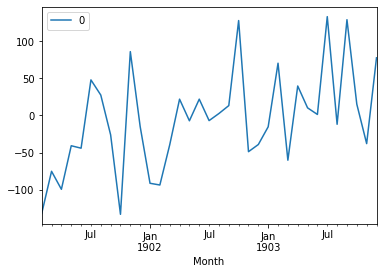

In [13]:
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

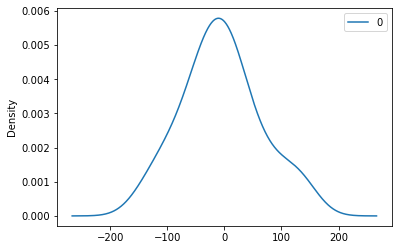

In [14]:
# density plot of residuals
residuals.plot(kind='kde')
plt.show()

In [15]:
# summary stats of residuals
print(residuals.describe())

                0
count   35.000000
mean    -5.495341
std     68.132876
min   -133.296774
25%    -42.478150
50%     -7.186610
75%     24.748236
max    133.237852


In [ ]:
# evaluate an ARIMA model using a walk-forward validation

In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [17]:
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

In [18]:
history = [x for x in train]
predictions = list()

In [19]:
# walk-forward validation

In [20]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=349.117694, expected=342.300000
predicted=306.512957, expected=339.700000
predicted=387.376486, expected=440.400000
predicted=348.154217, expected=315.900000
predicted=386.308807, expected=439.300000
predicted=356.082038, expected=401.300000
predicted=446.379503, expected=437.400000
predicted=394.737281, expected=575.500000
predicted=434.915425, expected=407.600000
predicted=507.923454, expected=682.000000
predicted=435.482891, expected=475.300000
predicted=652.743785, expected=581.300000
predicted=546.343395, expected=646.900000


In [21]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 83.417


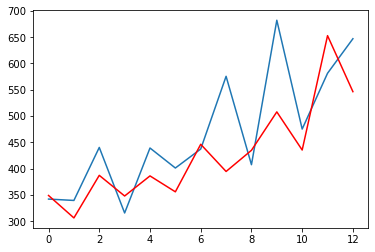

In [22]:
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [ ]:
# The model could use further tuning of the p, d, and maybe even the q parameters.